# Final Project Notebook

### Amber Greer and Ashlyn Mcconaha

#### University of Arizona - APCV-361 

#### Professor Li Xu


                                 Socioeconomic Factors and Health Outcomes

Research Question: “How do socioeconomic factors such as income, education, and employment affect health outcomes such as premature death rates and overall health quality in counties?”

## Summary

For our project we determined that income, education, and employment status were the variables we wanted to evaluate. 
By evaluating these variables in conjunction with quality-of-life variables such as poor or fair health, poor physical health days, poor mental health days, and low birthweight and/or length of life variables such as premature death (years of potential life lost before age 75) it would paint a robust picture of any correlations in those areas. 
The social economic factors and health outcomes that we have chosen will give us a variety of different results and We will be evaluating across three different areas New York, Texas and California. 

### Methodology/algorithm

#### Data Source and Collection

Source of Data:
Our analysis is based on data obtained from the County Health Rankings & Roadmaps program, which is a collaboration between the Robert Wood Johnson Foundation and the University of Wisconsin Population Health Institute.

Nature of the Data:
The dataset provides a comprehensive overview of health outcomes and health factors for nearly every county in the United States. It encompasses a wide range of measures that include variables related to:

Health Outcomes: Such as quality of life, length of life, and specific health behaviors.
Health Factors: Covering a broad spectrum, from socioeconomic factors like income, education, and employment, to environmental factors and access to healthcare.
The dataset is particularly valuable for public health research as it encapsulates various determinants of health in a geographically granular manner, allowing for county-level analysis.

Data Accessibility:
The data is publicly accessible and can be downloaded from the County Health Rankings & Roadmaps website. Specifically, the data used in our project can be found in the Rankings Data section of their site:

County Health Rankings & Roadmaps - Rankings Data Documentation

Data Collection Method:
The data was downloaded as an Excel file directly from the above-mentioned webpage. The dataset is provided in a format that is conducive to comprehensive analysis, with each row representing a county and columns representing various health indicators.

Initial Data Inspection:
Upon initial inspection, the dataset includes numerous variables, ranging from demographic data to detailed health metrics. Here is a glimpse of the first few rows of the dataset:

In [23]:
# Code to display the first few rows of the dataset
import pandas as pd

# Load the dataset
data = pd.read_csv('analytic_data2023_0.csv', low_memory=False)

# Display the first five rows of the dataset
data.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature Death raw value,Premature Death numerator,Premature Death denominator,...,% Female raw value,% Female numerator,% Female denominator,% Female CI low,% Female CI high,% Rural raw value,% Rural numerator,% Rural denominator,% Rural CI low,% Rural CI high
0,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v057_rawvalue,v057_numerator,v057_denominator,v057_cilow,v057_cihigh,v058_rawvalue,v058_numerator,v058_denominator,v058_cilow,v058_cihigh
1,00,000,00000,US,United States,2023,NaN,7281.9355638,4125218,917267406,...,0.5047067187,167509003,331893745,NaN,NaN,0.193,NaN,NaN,NaN,NaN
2,01,000,01000,AL,Alabama,2023,NaN,10350.071456,88086,13668498,...,0.5142542169,2591778,5039877,NaN,NaN,0.409631829,1957932,4779736,NaN,NaN
3,01,001,01001,AL,Autauga County,2023,1,8027.3947267,836,156081,...,0.513782892,30362,59095,NaN,NaN,0.4200216232,22921,54571,NaN,NaN
4,01,003,01003,AL,Baldwin County,2023,1,8118.3582061,3377,614143,...,0.5134771453,122872,239294,NaN,NaN,0.4227909911,77060,182265,NaN,NaN


Next Steps:
The subsequent steps will involve a detailed cleaning and preprocessing of this data to make it suitable for our analysis, which will be discussed in the next section of this notebook.

#### Data Cleaning and Preparation

Handling missing values: strategies and implementation.
Outlier detection and treatment.
Normalization/Standardization (if required).
Include code cells for each step with brief explanations.

In [69]:
import pandas as pd
data = pd.read_csv('ranked_measure_data.csv', low_memory=False)

In [91]:
selected_states = ['New York', 'Texas', 'California']
filtered_data = data[data['State'].isin(selected_states)]

In [92]:
print(filtered_data['State'].unique())
#filtered_data.to_csv('ranked_measure_data_filtered.csv')

['California' 'New York' 'Texas']


In [95]:
# Filtering data for the required states and metrics
birth_smoking_filtered_data = filtered_data[filtered_data['State'].isin(states)][['State', '% Low Birthweight', '% Adults Reporting Currently Smoking']].dropna()
print(birth_smoking_filtered_data)

# Aggregating the data at the state level
birth_smoking_state_aggregated_data = birth_smoking_filtered_data.groupby('State').mean()

           State  % Low Birthweight  % Adults Reporting Currently Smoking
190   California                7.0                                   9.0
191   California                7.0                                  10.0
193   California                6.0                                  14.0
194   California                6.0                                  15.0
195   California                6.0                                  15.0
...          ...                ...                                   ...
2816       Texas                6.0                                  21.0
2817       Texas                6.0                                  18.0
2818       Texas                5.0                                  20.0
2819       Texas                8.0                                  19.0
2820       Texas                8.0                                  20.0

[357 rows x 3 columns]


<Figure size 1000x600 with 0 Axes>

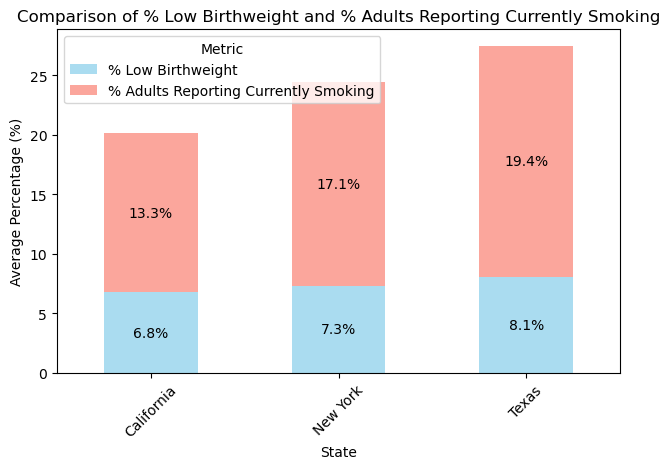

In [96]:
import matplotlib.pyplot as plt

# Plotting the stacked bar graph with percentages displayed as text
plt.figure(figsize=(10, 6))
ax = state_aggregated_data.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], alpha=0.7)

# Adding text annotations for each bar segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:  # Only display if the height is greater than 0
        ax.text(x + width/2, 
                y + height/2, 
                '{:.1f}%'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')
        
plt.title('Comparison of % Low Birthweight and % Adults Reporting Currently Smoking')
plt.ylabel('Average Percentage (%)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()

plt.show()

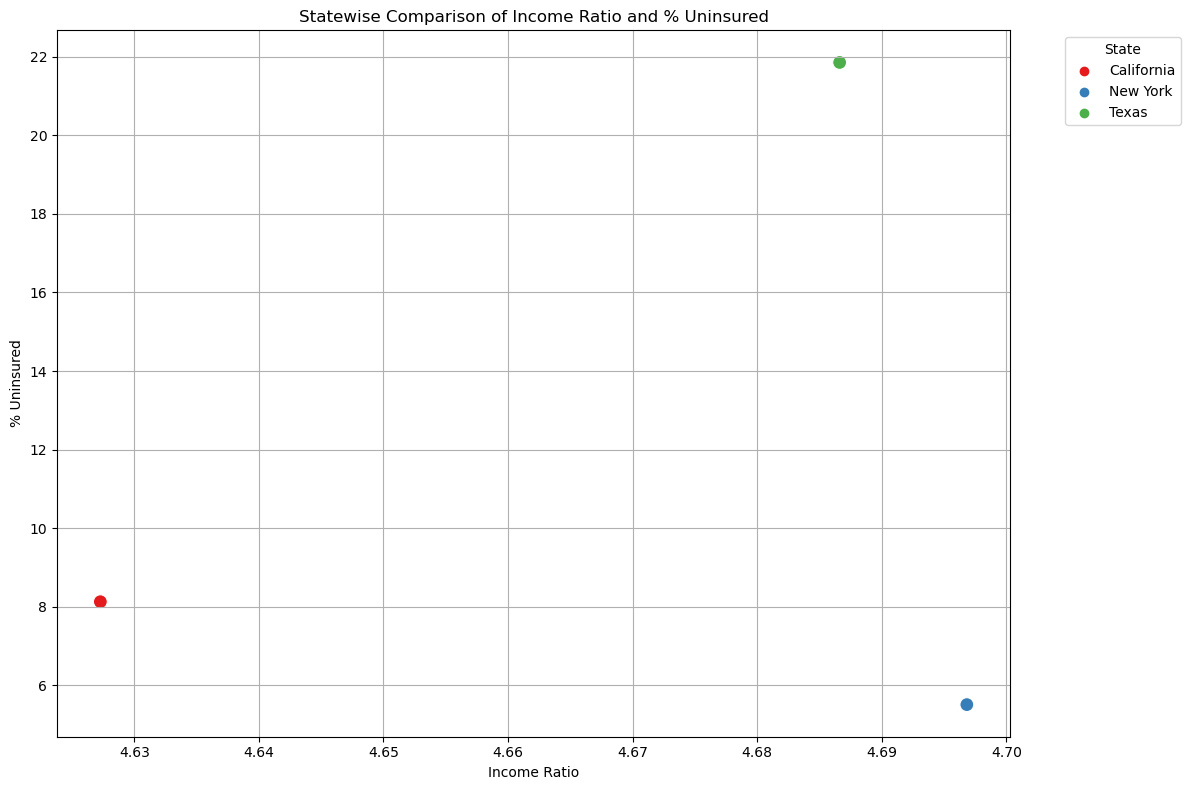

In [102]:
# Import seaborn
import seaborn as sns

# Filtering the dataset for "Income Ratio" and "% Uninsured" for each state
statewise_income_uninsured_data = filtered_data[['State', 'Income Ratio', '% Uninsured']].dropna()

# Aggregating the data at the state level
statewise_aggregated_income_uninsured = statewise_income_uninsured_data.groupby('State').mean()

# Plotting the scatter plot for statewise comparison with more distinguishable colors
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income Ratio', y='% Uninsured', data=statewise_aggregated_income_uninsured, 
                hue='State', palette='Set1', s=100)
plt.title('Statewise Comparison of Income Ratio and % Uninsured')
plt.xlabel('Income Ratio')
plt.ylabel('% Uninsured')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

**Exploratory Data Analysis (EDA)**
Descriptive statistics (mean, median, variance, etc.).
Data visualization (histograms, box plots, bar charts).
Identification of patterns or initial observations.
Use of markdown cells to explain findings from each plot or statistic.

**Correlation Analysis**
Calculation of correlation coefficients.
Visualization (scatter plots, heatmaps).
Interpretation of correlation results.
Discussion of potential relationships between variables.

**Regression Analysis (Optional)**
If you decide to include regression analysis, describe the model(s).
Implementation of linear or multiple regression models.
Interpretation of regression results.
Visualization of regression lines or coefficients.

**Inferential Statistics/Machine Learning (As Suggested by Professor)**
Brief description of the chosen method(s).
Implementation of the method(s) with code.
Interpretation of results.
Discussion on how these results help answer your research question.

**Geographic Analysis (Optional)**
If you include geographic analysis, use maps to show data distribution.
Discussion on geographical trends or patterns.

**Discussion**
Summarize key findings.
Discuss the implications of your results.
Address any limitations of your study.
Suggest areas for future research.

#### Results

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [16]:
def toColInt(df, cols):
    for c in cols:
        df[c] = df[c].fillna(0).astype('int')
    return df

In [17]:
def toColFloat(df, cols):
    for c in cols:
        df[c] = df[c].fillna(0).astype('float')
    return df

In [18]:
def cleanDF(df):
    #remove all rows with 0 at some column
    df = df[(df!=0).all(axis=1)]
    return df

In [19]:
def parseCSVData(filename,intcols=[], fcols=[]):
    df = pd.read_csv(filename)
    df = toColInt(df, intcols)
    df = toColFloat(df,fcols)
    return df

In [41]:
intcols =['FIPS']
fcols =['% Children in Poverty','Income Ratio','% Unemployed','% Completed High School','% Some College']
df = parseCSVData('analytic_data2023_0.csv', intcols, fcols)
df

ValueError: Usecols do not match columns, columns expected but not found: ['Income Ratio', '% Completed High School', '% Children in Poverty', '% Unemployed']

In [11]:
texas_df = df[df['State']=='Texas']
texas_df

,State,County,Population,% rural,FIPS,% Children in Poverty,% Unemployed,Income Ratio,% Children in Single-Parent Households,Violent Crime Rate,Injury Death Rate,Years of Potential Life Lost Rate,Median Household Income,% Enrolled in Free or Reduced Lunch,Segregation Index,% Homeowners,% Completed High School,% Some College
2056,Texas,Anderson,57805,67.063533,48001,27.6,5.624866,4.263033,29.428186,416.608925,94.786074,11158.0,50879.0,64.166667,35.526266,71.543340,82.496220,39.622642
2057,Texas,Andrews,18879,16.502097,48003,12.0,8.177874,5.043606,20.743920,493.888475,73.469746,8229.0,76600.0,47.923836,16.066732,74.703487,76.708699,40.467955
2058,Texas,Angelina,86796,43.082366,48005,25.1,7.640513,4.299872,34.039861,311.671238,69.005202,9838.0,49943.0,73.401820,35.442362,65.726218,83.009192,58.465084
2059,Texas,Aransas,23814,27.260558,48007,30.8,8.467653,5.303011,37.101747,476.548288,111.919875,12277.0,51461.0,64.733648,27.134706,81.849350,87.109090,49.965792
2060,Texas,Archer,8730,88.988292,48009,11.2,5.318333,5.159490,16.631689,201.651623,75.721071,5955.0,69566.0,32.075472,24.533222,83.717620,90.487726,62.260238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,Texas,Wood,46291,74.199314,48499,21.4,6.579608,4.462187,25.949074,175.198403,93.569845,9465.0,61886.0,60.718830,32.623013,81.413017,85.644969,47.685620
2259,Texas,Yoakum,8702,37.327072,48501,14.9,11.933107,5.410849,11.702503,182.363668,85.922623,9330.0,67132.0,59.406858,5.389776,77.277970,69.195901,46.511628
2260,Texas,Young,17904,33.568733,48503,22.1,5.254389,4.652823,25.057418,169.445204,107.670108,10430.0,54569.0,58.541927,25.371750,74.048859,84.823652,63.390313
2261,Texas,Zapata,14172,23.534028,48505,39.5,12.413043,6.460982,27.460050,96.041710,47.744762,7845.0,39876.0,85.460693,21.382529,70.100235,64.691235,39.810563


In [12]:
california_df = df[df['State']=='California']
california_df

,State,County,Population,% rural,FIPS,% Children in Poverty,% Unemployed,Income Ratio,% Children in Single-Parent Households,Violent Crime Rate,Injury Death Rate,Years of Potential Life Lost Rate,Median Household Income,% Enrolled in Free or Reduced Lunch,Segregation Index,% Homeowners,% Completed High School,% Some College
160,California,Alameda,1662323,0.388606,6001,9.1,8.773087,5.162124,19.199471,628.781962,44.782410,4650.0,113518.0,41.963730,35.558176,53.610422,88.815939,77.368145
161,California,Amador,40083,60.423722,6005,13.0,9.130616,4.569409,21.509824,237.070738,102.444846,6929.0,68141.0,40.043186,13.906038,76.771760,91.197195,58.411528
162,California,Butte,212744,18.901818,6007,18.7,9.188588,5.472435,20.990635,327.057309,100.773310,7851.0,54718.0,58.925061,31.377194,59.474958,89.706778,68.746036
163,California,Calaveras,46308,75.409189,6009,16.1,7.634272,4.291738,24.070138,327.245738,94.902386,7892.0,66329.0,49.716981,22.295655,79.561269,89.705092,58.522260
164,California,Colusa,21558,31.724170,6011,12.9,15.953900,4.843310,19.020812,200.958056,71.213873,6877.0,59422.0,75.637336,15.840299,63.460226,72.829969,51.257463
165,California,Contra Costa,1152333,0.792736,6013,7.9,8.871957,4.646118,18.861632,336.027791,50.464919,4994.0,106484.0,39.478492,36.776156,66.843753,89.899189,72.497182
166,California,Del Norte,27968,33.673541,6015,23.4,9.454545,5.360381,29.485466,609.109201,113.982311,9204.0,47442.0,66.134259,17.202050,68.393677,79.722756,41.764011
167,California,El Dorado,192925,34.699930,6017,8.8,8.253262,4.922710,14.742184,217.583946,73.181657,5328.0,87792.0,30.813137,30.291094,75.526150,94.032769,69.934321
168,California,Fresno,1000918,10.805202,6019,23.1,11.281250,5.126403,27.283479,541.779216,65.053734,7511.0,61401.0,74.199165,24.832901,53.667078,77.278136,56.932657
169,California,Glenn,28283,40.871915,6021,17.2,8.855824,4.798986,20.946398,408.141346,95.811273,7905.0,57779.0,69.729445,10.937803,58.437745,74.492112,44.325109


In [14]:
newyork_df = df[df['State']=='New York']
newyork_df

,State,County,Population,% rural,FIPS,% Children in Poverty,% Unemployed,Income Ratio,% Children in Single-Parent Households,Violent Crime Rate,Injury Death Rate,Years of Potential Life Lost Rate,Median Household Income,% Enrolled in Free or Reduced Lunch,Segregation Index,% Homeowners,% Completed High School,% Some College
1485,New York,Albany,303654,9.696125,36001,12.5,7.181903,4.604018,29.112089,348.218442,52.321736,6525.0,70629.0,41.584000,43.770735,56.062971,92.356716,77.917481
1486,New York,Allegany,45587,78.739836,36003,21.0,8.068074,4.256907,19.047619,195.029414,63.340500,7084.0,53371.0,51.220687,50.678573,79.132461,91.697318,64.942218
1487,New York,Bronx,1401142,0.002816,36005,30.6,16.030909,6.866691,49.836286,586.057616,54.928973,8106.0,44906.0,86.688012,38.052639,20.058416,73.429451,52.829416
1488,New York,Broome,189420,26.056830,36007,23.8,8.668205,5.128775,25.014879,314.954586,76.519458,7542.0,52510.0,51.813259,41.906044,65.109144,90.281915,66.521771
1489,New York,Cattaraugus,75863,61.752805,36009,22.0,9.414037,4.657799,23.928951,197.200401,72.685589,8180.0,51824.0,50.910957,44.721904,72.158505,89.674727,56.256015
1490,New York,Cayuga,76029,55.781871,36011,15.3,7.902984,4.322781,25.245114,241.441258,66.456567,6976.0,59335.0,47.055979,33.972959,70.897311,88.230957,58.290031
1491,New York,Chautauqua,126032,43.862718,36013,19.4,8.917294,4.828270,24.153446,271.383368,77.569813,7860.0,50062.0,55.447182,40.724861,68.615385,89.423109,59.892598
1492,New York,Chemung,82622,24.178768,36015,20.1,8.755292,4.423196,26.131550,192.947400,88.107605,8580.0,54705.0,47.806302,32.750043,67.201701,89.902549,59.996098
1493,New York,Chenango,46730,83.412247,36017,15.7,6.888787,4.331190,21.098856,183.394123,66.410273,8554.0,52545.0,49.657484,26.360470,74.752808,88.468300,55.286575
1494,New York,Clinton,79778,64.155952,36019,13.1,7.966824,4.190493,18.072289,157.255006,57.318535,6328.0,59741.0,41.934574,37.028066,67.880344,88.045211,55.112705


In [15]:
df = df[['% Children in Poverty','Income Ratio','% Unemployed','% Completed High School','% Some College']]
df

,% Children in Poverty,Income Ratio,% Unemployed,% Completed High School,% Some College
0,14.9,5.135446,4.884279,88.713682,60.721736
1,12.4,4.386478,5.606482,90.471385,65.532108
2,37.5,5.994927,7.045534,74.731696,38.355755
3,21.9,5.394051,6.631944,80.884469,37.770409
4,18.9,4.764969,4.087425,82.825137,56.266590
...,...,...,...,...,...
2573,6.9,5.560169,7.243163,95.404846,65.630324
2574,8.4,4.185182,7.351248,92.569769,61.926416
2575,9.7,3.666622,6.250000,93.103185,57.703349
2576,10.7,3.523700,5.269730,92.003626,62.403952


In [16]:
df.corr().style.background_gradient(cmap='coolwarm')

,% Children in Poverty,Income Ratio,% Unemployed,% Completed High School,% Some College
% Children in Poverty,1.000000,0.581333,0.317994,-0.672253,-0.659857
Income Ratio,0.581333,1.000000,0.262294,-0.406331,-0.259023
% Unemployed,0.317994,0.262294,1.000000,-0.222972,-0.177382
% Completed High School,-0.672253,-0.406331,-0.222972,1.000000,0.759207
% Some College,-0.659857,-0.259023,-0.177382,0.759207,1.000000


#### Conclusion

**References**